# <b><span style='color:#F1A424'>AutoML - Binary Classification - Wine Quality Prediction</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used : Wine Quality Dataset**

**Features**:

- `fixed acidity`: fixed acidity of wine.
- `volatile acidity`: volatile acidity of wine.
- `citric acid`: citric acid of wine.
- `residual sugar`: residual sugar of wine.
- `chlorides`: chlorides.
- `free sulfur dioxide`: free sulfur dioxide in wine.
- `total sulfur dioxide`: total sulfur dioxide in wine.
- `density`: density of wine.
- `pH`: pH of wine.
- `sulphates`: sulphates in wine.
- `alcohol`: alcohol in wine.

**Target Variable**:

- `quality`: Quality of wine

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the quality of wine.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [6]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [7]:
# Loading dataset from example data collection
load_example_data('teradataml','wine_data')

In [8]:
# Fetching in teradata dataframe
wine_df = DataFrame("wine_data")

In [9]:
# first 5 rows
wine_df.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
5.1,0.585,0.0,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,good
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


In [10]:
# wine_df dataset
wine_df.shape

(1599, 12)

In [11]:
# Performing sampling to get 80% for trainning and 20% for testing
wine_df_sample = wine_df.sample(frac = [0.8, 0.2])

In [12]:
wine_df_sample.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sampleid
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good,1
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad,1
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad,1
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good,1
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good,1
5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.9924,3.46,0.87,12.9,good,2
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good,1
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good,1
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good,1
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad,2


In [13]:
# Fetching train and test data
wine_df_train= wine_df_sample[wine_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
wine_df_test = wine_df_sample[wine_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [14]:
# train data shape
wine_df_train.shape

(1279, 12)

In [15]:
# test data shape
wine_df_test.shape

(320, 12)

In [16]:
#train dataset
wine_df_train.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.1,0.585,0.0,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,good
5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.9921,3.9,0.62,12.8,good
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good


In [17]:
# test dataset
wine_df_test.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.9924,3.46,0.87,12.9,good
5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.6,good
5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,good
5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,good
5.6,0.915,0.0,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4,bad
5.6,0.66,0.0,2.5,0.066,7.0,15.0,0.99256,3.52,0.58,12.9,bad
5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,good
5.3,0.57,0.01,1.7,0.054,5.0,27.0,0.9934,3.57,0.84,12.5,good
5.1,0.42,0.0,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [18]:
# Creating AutoML instance
# Including 'svm' from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 300 sec
# Using max_models 4
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Classification",
             include='svm',
             stopping_metric='MICRO-RECALL', 
             stopping_tolerance=0.60,
             max_runtime_secs=300,
             max_models=4,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 1279
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
volatile_acidity,FLOAT,1279,0,None,0,1279,0,0.0,100.0
free_sulfur_dioxide,FLOAT,1279,0,None,0,1279,0,0.0,100.0
pH,FLOAT,1279,0,None,0,1279,0,0.0,100.0
total_sulfur_dioxide,FLOAT,1279,0,None,0,1279,0,0.0,100.0
fixed_acidity,FLOAT,1279,0,None,0,1279,0,0.0,100.0
alcohol,FLOAT,1279,0,None,0,1279,0,0.0,100.0
chlorides,FLOAT,1279,0,None,0,1279,0,0.0,100.0
density,FLOAT,1279,0,None,0,1279,0,0.0,100.0
residual_sugar,FLOAT,1279,0,None,0,1279,0,0.0,100.0
citric_acid,FLOAT,1279,0,None,112,1167,0,0.0,100.0



Statistics of Data:


func,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
50%,7.9,0.52,0.25,2.2,0.079,13,37,0.997,3.31,0.62,10.1
count,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
mean,8.311,0.527,0.271,2.547,0.087,15.912,46.497,0.997,3.312,0.66,10.417
min,4.7,0.12,0,0.9,0.012,1,6,0.99,2.74,0.33,8.4
max,15.9,1.185,1,15.4,0.611,72,289,1.004,4.01,2,14.9
75%,9.2,0.64,0.43,2.6,0.09,21,62,0.998,3.4,0.73,11.1
25%,7.1,0.39,0.09,1.9,0.07,7,22,0.996,3.21,0.55,9.5
std,1.73,0.174,0.196,1.411,0.047,10.65,32.787,0.002,0.155,0.176,1.074



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
quality                   2         

No Futile columns found.

Target Column Distribution:


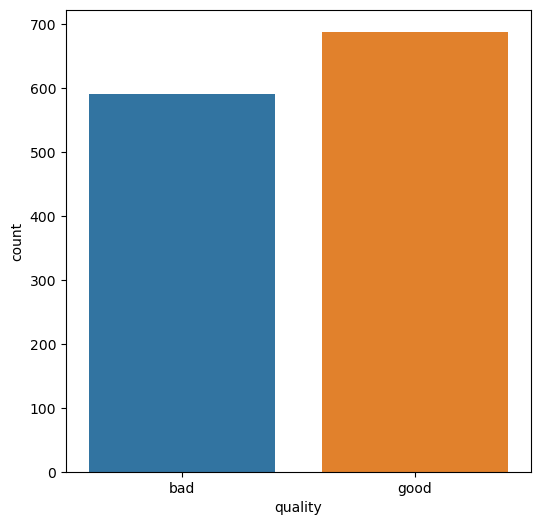

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0   free_sulfur_dioxide           2.111024
1             chlorides           6.489445
2               density           2.736513
3  total_sulfur_dioxide           3.440188
4               alcohol           0.781861
5             sulphates           3.909304
6        residual_sugar          10.164191
7         fixed_acidity           2.658327
8                    pH           2.267396
9           citric_acid           0.078186


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
10.5,0.24,0.47,2.1,0.066,6.0,24.0,0.9978,3.15,0.9,11.0,good
9.0,0.66,0.17,3.0,0.077,5.0,13.0,0.9976,3.29,0.55,10.4,bad
9.0,0.46,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,good
8.4,0.29,0.4,1.7,0.067,8.0,20.0,0.99603,3.39,0.6,10.5,bad
8.2,0.885,0.2,1.4,0.086,7.0,31.0,0.9946,3.11,0.46,10.0,bad
8.2,0.35,0.33,2.4,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,good
7.4,0.36,0.29,2.6,0.087,26.0,72.0,0.99645,3.39,0.68,11.0,bad
7.4,0.41,0.24,1.8,0.066,18.0,47.0,0.9956,3.37,0.62,10.4,bad
8.6,0.49,0.29,2.0,0.11,19.0,133.0,0.9972,2.93,1.98,9.8,bad
8.6,0.635,0.68,1.8,0.403,19.0,56.0,0.99632,3.02,1.15,9.3,bad


Remaining Rows in the data: 1110                                                        
Remaining Columns in the data: 12


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171996696583280"' - 1/15


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


fixed_acidity,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,sulphates,id,alcohol,residual_sugar,pH,chlorides,citric_acid,quality
8.6,19.0,0.49,133.0,0.9972,1.98,13,9.8,2.0,2.93,0.11,0.29,0
8.2,7.0,0.885,31.0,0.9946,0.46,15,10.0,1.4,3.11,0.086,0.2,0
8.2,11.0,0.35,47.0,0.99599,0.81,23,11.0,2.4,3.27,0.076,0.33,1
13.7,17.0,0.415,43.0,1.0014,0.8,9,10.0,2.9,3.06,0.085,0.68,1
8.4,8.0,0.29,20.0,0.99603,0.6,12,10.5,1.7,3.39,0.067,0.4,0
8.4,16.0,0.56,44.0,0.9958,0.52,20,11.0,2.1,3.13,0.105,0.08,0
7.4,26.0,0.36,72.0,0.99645,0.68,11,11.0,2.6,3.39,0.087,0.29,0
7.4,18.0,0.41,47.0,0.9956,0.62,19,10.4,1.8,3.37,0.066,0.24,0
9.0,5.0,0.66,13.0,0.9976,0.55,14,10.4,3.0,3.29,0.077,0.17,0
9.0,19.0,0.46,98.0,0.99815,0.63,22,9.5,2.8,3.32,0.093,0.31,1


fixed_acidity,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,sulphates,id,alcohol,residual_sugar,pH,chlorides,citric_acid,quality
7.5,50.0,0.63,110.0,0.9983,0.77,25,9.4,5.1,3.26,0.111,0.12,0
9.0,26.0,0.43,86.0,0.9987,0.62,30,9.5,2.5,3.38,0.08,0.34,1
9.0,8.0,0.58,21.0,0.99769,0.72,126,9.6,2.0,3.27,0.104,0.25,0
10.5,6.0,0.24,22.0,0.9976,1.05,26,10.8,1.8,3.21,0.077,0.42,1
8.2,11.0,0.4,43.0,0.9975,0.61,31,10.5,2.8,3.53,0.089,0.44,1
8.2,7.0,1.0,37.0,0.99685,0.55,127,9.0,2.3,3.32,0.065,0.09,1
8.4,38.0,0.62,46.0,0.99504,0.89,28,11.8,1.8,3.38,0.072,0.12,1
8.4,10.0,0.715,38.0,0.99735,0.64,124,9.4,2.4,3.31,0.076,0.2,0
7.4,15.0,0.55,34.0,0.99655,0.68,27,10.5,1.8,3.49,0.082,0.19,0
7.4,24.0,0.62,42.0,0.9961,0.57,123,11.5,1.9,3.42,0.068,0.05,1


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0             sulphates           4.144144
1               density           2.612613
2               alcohol           0.810811
3         fixed_acidity           2.792793
4                    pH           2.252252
5           citric_acid           0.090090
6  total_sulfur_dioxide           3.333333
7             chlorides           6.846847
8        residual_sugar          10.090090
9      volatile_acidity           1.171171


['free_sulfur_dioxide', 'pH', 'density', 'total_sulfur_dioxide', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'alcohol', 'chlorides', 'sulphates']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171998472162707"'% - 7/15


fixed_acidity,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,sulphates,id,alcohol,residual_sugar,pH,chlorides,citric_acid,quality
7.4,19.0,0.785,98.0,0.99713,0.52,139,9.566666667,5.2,3.16,0.094,0.19,1
7.4,34.0,0.52,61.0,0.99528,0.59,51,10.8,2.4,3.43,0.078,0.13,1
7.4,15.0,0.74,48.0,0.99502,0.48,59,10.0,1.7,3.12,0.086,0.07,0
7.4,18.0,0.41,47.0,0.9956,0.62,19,10.4,1.8,3.37,0.066,0.24,0
7.4,9.0,0.29,30.0,0.9968,0.53,227,9.5,1.7,3.41,0.062,0.38,1
7.4,11.0,0.7,34.0,0.9978,0.56,179,9.4,1.9,3.51,0.076,0.0,0
7.4,26.0,0.36,72.0,0.99645,0.68,11,11.0,2.6,3.39,0.087,0.29,0
7.4,6.0,0.59,29.0,0.9974,0.5,171,9.0,4.4,3.38,0.086,0.08,0
7.4,8.0,0.64,23.0,0.9961,0.58,107,9.6,1.8,3.3,0.1,0.07,0
7.4,36.0,0.6,121.0,0.9982,0.49,147,9.4,7.3,3.37,0.07,0.26,0


['residual_sugar']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171992831432790"'% - 7/15


fixed_acidity,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,sulphates,id,alcohol,residual_sugar,pH,chlorides,citric_acid,quality
7.5,36.0,0.61,60.0,0.99494,0.4,289,9.3,1.7,3.1,0.076,0.2,0
7.5,30.0,0.77,92.0,0.99892,0.58,265,9.2,2.2,3.2,0.098,0.2,0
7.5,12.0,0.52,20.0,0.99474,0.64,273,11.8,2.2,3.26,0.06,0.4,1
7.5,24.0,0.61,88.0,0.99612,0.53,113,9.8,1.9,3.3,0.073,0.26,0
7.5,29.0,0.4,53.0,0.9967,0.7,89,10.3,3.0,3.37,0.092,0.12,1
7.5,27.0,0.58,46.0,0.99592,0.47,105,9.2,2.2,3.02,0.08,0.03,0
7.5,5.0,0.38,12.0,0.99605,0.55,65,11.4,2.3,3.36,0.106,0.57,1
7.5,4.0,0.27,8.0,0.9951,0.64,145,11.0,2.3,3.4,0.05,0.34,1
7.5,12.0,0.52,35.0,0.9968,0.62,217,9.5,1.9,3.38,0.085,0.16,1
7.5,7.0,0.42,25.0,0.99628,0.44,233,10.4,2.7,3.24,0.067,0.32,0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171993642549281"'% - 8/15
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719100834760017"'


['fixed_acidity', 'free_sulfur_dioxide', 'volatile_acidity', 'density', 'total_sulfur_dioxide', 'sulphates', 'alcohol', 'residual_sugar', 'pH', 'chlorides', 'citric_acid']


['fixed_acidity', 'free_sulfur_dioxide', 'volatile_acidity', 'density', 'total_sulfur_dioxide', 'sulphates', 'alcohol', 'residual_sugar', 'pH', 'chlorides', 'citric_acid']


quality,id,fixed_acidity,free_sulfur_dioxide,volatile_acidity,density,total_sulfur_dioxide,sulphates,alcohol,residual_sugar,pH,chlorides,citric_acid
0,12,0.47142857142857153,0.17073170731707318,0.192090395480226,0.4252873563218467,0.11475409836065574,0.3709677419354838,0.3829787234042554,0.20833333333333331,0.6081081081081082,0.3246753246753248,0.5263157894736842
0,15,0.4428571428571428,0.14634146341463414,0.8644067796610171,0.2643678160919653,0.20491803278688525,0.14516129032258068,0.27659574468085113,0.0833333333333333,0.22972972972972958,0.5714285714285714,0.2631578947368421
1,17,0.3428571428571429,0.17073170731707318,0.45197740112994356,0.563218390804604,0.26229508196721313,0.3870967741935484,0.3829787234042554,0.4583333333333332,0.8648648648648648,0.5844155844155844,0.5526315789473684
1,18,0.7714285714285715,0.21951219512195122,0.18079096045197746,0.6781609195402373,0.14754098360655737,0.8387096774193549,0.14893617021276614,0.20833333333333331,0.35135135135135154,0.4935064935064936,0.6710526315789473
0,20,0.47142857142857153,0.36585365853658536,0.497175141242938,0.40229885057472264,0.3114754098360656,0.24193548387096778,0.4893617021276596,0.375,0.25675675675675663,0.8181818181818183,0.10526315789473684
1,22,0.5571428571428572,0.43902439024390244,0.38418079096045205,0.6666666666666752,0.7540983606557377,0.41935483870967744,0.17021276595744692,0.6666666666666665,0.5135135135135133,0.6623376623376624,0.40789473684210525
0,19,0.3285714285714287,0.4146341463414634,0.3276836158192091,0.3793103448275985,0.3360655737704918,0.40322580645161293,0.3617021276595746,0.25,0.5810810810810811,0.31168831168831174,0.3157894736842105
0,14,0.5571428571428572,0.0975609756097561,0.6101694915254239,0.6091954022988649,0.05737704918032787,0.29032258064516137,0.3617021276595746,0.7499999999999999,0.47297297297297297,0.4545454545454546,0.2236842105263158
0,11,0.3285714285714287,0.6097560975609756,0.2711864406779661,0.4712643678160949,0.5409836065573771,0.5000000000000001,0.4893617021276596,0.5833333333333333,0.6081081081081082,0.5844155844155844,0.381578947368421
1,10,0.7714285714285715,0.12195121951219512,0.13559322033898305,0.632183908045989,0.14754098360655737,0.8548387096774194,0.4893617021276596,0.375,0.28378378378378366,0.31168831168831174,0.6184210526315789


quality,id,fixed_acidity,free_sulfur_dioxide,volatile_acidity,density,total_sulfur_dioxide,sulphates,alcohol,residual_sugar,pH,chlorides,citric_acid
1,485,0.25714285714285723,0.3170731707317073,0.5762711864406781,0.3333333333333376,0.27049180327868855,0.2580645161290323,0.4468085106382981,0.4999999999999999,0.5405405405405402,0.4415584415584416,0.013157894736842105
1,541,0.25714285714285723,0.12195121951219512,0.37288135593220345,0.13793103448277005,0.04918032786885246,0.4516129032258065,0.574468085106383,0.4999999999999999,0.4864864864864862,0.012987012987012912,0.14473684210526316
0,717,0.8571428571428571,0.4878048780487805,0.30508474576271194,0.8965517241379416,0.7786885245901639,0.22580645161290325,0.17021276595744692,0.625,0.25675675675675663,0.6883116883116884,0.7105263157894737
1,549,0.25714285714285723,0.2926829268292683,0.4180790960451978,0.3678160919540365,0.16393442622950818,0.435483870967742,0.23404255319148962,0.20833333333333331,0.5945945945945944,0.48051948051948057,0.25
1,573,0.25714285714285723,0.12195121951219512,0.5819209039548023,0.43678160919540876,0.09836065573770492,0.3548387096774193,0.34042553191489383,0.4999999999999999,0.6216216216216214,2.5844155844155847,0.2236842105263158
0,797,-0.014285714285714235,0.7560975609756098,1.0395480225988702,0.12643678160919525,0.7377049180327869,0.40322580645161293,0.5957446808510638,0.16666666666666669,1.0810810810810811,0.10389610389610392,0.3157894736842105
0,733,0.8571428571428571,0.0975609756097561,0.2598870056497175,0.7241379310344982,0.12295081967213115,0.2580645161290323,0.3829787234042554,0.7916666666666666,0.3108108108108107,0.6233766233766235,0.631578947368421
0,669,0.25714285714285723,0.43902439024390244,0.4858757062146894,0.43678160919540876,0.2786885245901639,0.3548387096774193,0.2978723404255319,0.4166666666666667,0.6351351351351352,0.4415584415584416,0.19736842105263158
0,373,0.9857142857142858,0.12195121951219512,0.5762711864406781,0.6436781609195511,0.16393442622950818,0.3709677419354838,0.3617021276595746,0.0833333333333333,0.1756756756756755,0.3766233766233766,0.6578947368421053
1,213,0.9714285714285715,0.2682926829268293,0.2824858757062147,0.40229885057472264,0.14754098360655737,0.4516129032258065,0.872340425531915,0.4583333333333332,0.08108108108108113,0.4675324675324676,0.9078947368421052


['fixed_acidity', 'free_sulfur_dioxide', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol', 'pH', 'chlorides', 'citric_acid']


['r_fixed_acidity', 'r_free_sulfur_dioxide', 'r_volatile_acidity', 'r_total_sulfur_dioxide', 'r_density', 'r_sulphates', 'r_alcohol', 'r_pH', 'r_chlorides', 'r_citric_acid']


quality,id,r_fixed_acidity,r_free_sulfur_dioxide,r_volatile_acidity,r_total_sulfur_dioxide,r_density,r_sulphates,r_alcohol,r_pH,r_chlorides,r_citric_acid
0,12,0.47142857142857153,0.17073170731707318,0.192090395480226,0.11475409836065574,0.4252873563218467,0.3709677419354838,0.3829787234042554,0.6081081081081082,0.3246753246753248,0.5263157894736842
0,15,0.4428571428571428,0.14634146341463414,0.8644067796610171,0.20491803278688525,0.2643678160919653,0.14516129032258068,0.27659574468085113,0.22972972972972958,0.5714285714285714,0.2631578947368421
1,17,0.3428571428571429,0.17073170731707318,0.45197740112994356,0.26229508196721313,0.563218390804604,0.3870967741935484,0.3829787234042554,0.8648648648648648,0.5844155844155844,0.5526315789473684
1,18,0.7714285714285715,0.21951219512195122,0.18079096045197746,0.14754098360655737,0.6781609195402373,0.8387096774193549,0.14893617021276614,0.35135135135135154,0.4935064935064936,0.6710526315789473
0,20,0.47142857142857153,0.36585365853658536,0.497175141242938,0.3114754098360656,0.40229885057472264,0.24193548387096778,0.4893617021276596,0.25675675675675663,0.8181818181818183,0.10526315789473684
1,22,0.5571428571428572,0.43902439024390244,0.38418079096045205,0.7540983606557377,0.6666666666666752,0.41935483870967744,0.17021276595744692,0.5135135135135133,0.6623376623376624,0.40789473684210525
0,19,0.3285714285714287,0.4146341463414634,0.3276836158192091,0.3360655737704918,0.3793103448275985,0.40322580645161293,0.3617021276595746,0.5810810810810811,0.31168831168831174,0.3157894736842105
0,14,0.5571428571428572,0.0975609756097561,0.6101694915254239,0.05737704918032787,0.6091954022988649,0.29032258064516137,0.3617021276595746,0.47297297297297297,0.4545454545454546,0.2236842105263158
0,11,0.3285714285714287,0.6097560975609756,0.2711864406779661,0.5409836065573771,0.4712643678160949,0.5000000000000001,0.4893617021276596,0.6081081081081082,0.5844155844155844,0.381578947368421
1,10,0.7714285714285715,0.12195121951219512,0.13559322033898305,0.14754098360655737,0.632183908045989,0.8548387096774194,0.4893617021276596,0.28378378378378366,0.31168831168831174,0.6184210526315789


quality,id,r_fixed_acidity,r_free_sulfur_dioxide,r_volatile_acidity,r_total_sulfur_dioxide,r_density,r_sulphates,r_alcohol,r_pH,r_chlorides,r_citric_acid
1,485,0.25714285714285723,0.3170731707317073,0.5762711864406781,0.27049180327868855,0.3333333333333376,0.2580645161290323,0.4468085106382981,0.5405405405405402,0.4415584415584416,0.013157894736842105
1,541,0.25714285714285723,0.12195121951219512,0.37288135593220345,0.04918032786885246,0.13793103448277005,0.4516129032258065,0.574468085106383,0.4864864864864862,0.012987012987012912,0.14473684210526316
0,717,0.8571428571428571,0.4878048780487805,0.30508474576271194,0.7786885245901639,0.8965517241379416,0.22580645161290325,0.17021276595744692,0.25675675675675663,0.6883116883116884,0.7105263157894737
1,549,0.25714285714285723,0.2926829268292683,0.4180790960451978,0.16393442622950818,0.3678160919540365,0.435483870967742,0.23404255319148962,0.5945945945945944,0.48051948051948057,0.25
1,573,0.25714285714285723,0.12195121951219512,0.5819209039548023,0.09836065573770492,0.43678160919540876,0.3548387096774193,0.34042553191489383,0.6216216216216214,2.5844155844155847,0.2236842105263158
0,797,-0.014285714285714235,0.7560975609756098,1.0395480225988702,0.7377049180327869,0.12643678160919525,0.40322580645161293,0.5957446808510638,1.0810810810810811,0.10389610389610392,0.3157894736842105
0,733,0.8571428571428571,0.0975609756097561,0.2598870056497175,0.12295081967213115,0.7241379310344982,0.2580645161290323,0.3829787234042554,0.3108108108108107,0.6233766233766235,0.631578947368421
0,669,0.25714285714285723,0.43902439024390244,0.4858757062146894,0.2786885245901639,0.43678160919540876,0.3548387096774193,0.2978723404255319,0.6351351351351352,0.4415584415584416,0.19736842105263158
0,373,0.9857142857142858,0.12195121951219512,0.5762711864406781,0.16393442622950818,0.6436781609195511,0.3709677419354838,0.3617021276595746,0.1756756756756755,0.3766233766233766,0.6578947368421053
1,213,0.9714285714285715,0.2682926829268293,0.2824858757062147,0.14754098360655737,0.40229885057472264,0.4516129032258065,0.872340425531915,0.08108108108108113,0.4675324675324676,0.9078947368421052


['fixed_acidity', 'free_sulfur_dioxide', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol', 'residual_sugar', 'pH', 'chlorides', 'citric_acid']


quality,id,fixed_acidity,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,sulphates,alcohol,residual_sugar,pH,chlorides,citric_acid
0,233,0.3428571428571429,0.14634146341463414,0.33898305084745767,0.1557377049180328,0.4543352601156219,0.11290322580645162,0.3617021276595746,0.625,0.40540540540540565,0.3246753246753248,0.42105263157894735
1,69,0.5,0.04878048780487805,0.22033898305084748,0.0,0.32023121387284054,0.48387096774193555,0.6808510638297873,0.4166666666666667,0.4459459459459459,0.48051948051948057,0.5263157894736842
1,117,0.5,0.12195121951219512,0.33898305084745767,0.04918032786885246,0.3248554913294926,0.5161290322580644,0.6382978723404253,0.25,0.5540540540540541,0.3376623376623378,0.5131578947368421
1,94,0.5571428571428572,0.6829268292682927,0.31638418079096053,0.32786885245901637,0.22543352601156322,0.3709677419354838,0.7446808510638296,0.4999999999999999,0.35135135135135154,0.3376623376623378,0.5657894736842105
1,163,0.3285714285714287,0.3170731707317073,0.4180790960451978,0.1557377049180328,0.17687861271676794,0.41935483870967744,0.7021276595744681,0.375,0.5540540540540541,0.3766233766233766,0.35526315789473684
0,179,0.3285714285714287,0.24390243902439024,0.6553672316384181,0.22950819672131148,0.6300578034682204,0.3064516129032259,0.14893617021276614,0.29166666666666663,0.7702702702702698,0.4415584415584416,0.0
1,135,0.4428571428571428,0.07317073170731707,0.2372881355932204,0.04918032786885246,0.2751445086705279,0.6290322580645161,0.872340425531915,0.6666666666666665,0.4864864864864862,0.3246753246753248,0.42105263157894735
0,151,0.4428571428571428,0.21951219512195122,0.18079096045197746,0.13114754098360656,0.6855491329479809,0.5000000000000001,0.40425531914893614,0.7499999999999999,0.6081081081081082,0.8051948051948052,0.7894736842105263
1,92,0.47142857142857153,0.2682926829268293,0.2824858757062147,0.10655737704918032,0.36416184971099663,0.7096774193548389,0.5319148936170212,0.4583333333333332,0.3108108108108107,0.27272727272727276,0.5657894736842105
0,20,0.47142857142857153,0.36585365853658536,0.497175141242938,0.3114754098360656,0.39884393063584855,0.24193548387096778,0.4893617021276596,0.375,0.25675675675675663,0.8181818181818183,0.10526315789473684


quality,id,fixed_acidity,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,sulphates,alcohol,residual_sugar,pH,chlorides,citric_acid
1,26,0.7714285714285715,0.12195121951219512,0.13559322033898305,0.13114754098360656,0.6069364161849858,1.0967741935483872,0.4468085106382981,0.25,0.3648648648648648,0.4545454545454546,0.5526315789473684
0,25,0.3428571428571429,1.1951219512195121,0.5762711864406781,0.8524590163934426,0.687861271676307,0.6451612903225807,0.14893617021276614,1.6249999999999996,0.43243243243243207,0.8961038961038964,0.15789473684210525
0,121,0.3428571428571429,0.3902439024390244,0.42937853107344637,0.7868852459016393,0.6300578034682204,0.6935483870967742,0.3829787234042554,2.041666666666666,0.5540540540540541,0.3766233766233766,0.47368421052631576
1,29,0.5,1.2682926829268293,0.11299435028248589,0.5819672131147541,0.4265895953757352,0.8064516129032259,0.4893617021276596,0.29166666666666663,0.7162162162162163,0.28571428571428575,0.47368421052631576
1,30,0.5571428571428572,0.6097560975609756,0.35028248587570626,0.6557377049180327,0.734104046242789,0.40322580645161293,0.17021276595744692,0.5416666666666666,0.5945945945945944,0.4935064935064936,0.4473684210526316
0,126,0.5571428571428572,0.17073170731707318,0.519774011299435,0.12295081967213115,0.6173410404624337,0.564516129032258,0.1914893617021277,0.3333333333333333,0.4459459459459459,0.8051948051948052,0.32894736842105265
0,27,0.3285714285714287,0.34146341463414637,0.4858757062146894,0.22950819672131148,0.4855491329479912,0.5000000000000001,0.3829787234042554,0.25,0.7432432432432434,0.5194805194805195,0.25
1,123,0.3285714285714287,0.5609756097560976,0.5649717514124294,0.29508196721311475,0.4335260115607005,0.32258064516129026,0.5957446808510638,0.29166666666666663,0.6486486486486485,0.3376623376623378,0.06578947368421052
1,31,0.4428571428571428,0.24390243902439024,0.31638418079096053,0.30327868852459017,0.5953757225433685,0.3870967741935484,0.3829787234042554,0.6666666666666665,0.7972972972972969,0.6103896103896104,0.5789473684210527
1,127,0.4428571428571428,0.14634146341463414,0.9943502824858759,0.2540983606557377,0.5202312138728431,0.29032258064516137,0.06382978723404269,0.4583333333333332,0.5135135135135133,0.29870129870129875,0.11842105263157894


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8']


response_column : quality                                                                                                                             
name : svm
model_type : Classification
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
tolerance : (0.001, 0.01)
learning_rate : OPTIMAL
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
nesterov : True
intercept : True
iter_num_no_change : (5, 10, 50)
local_sgd_iterations  : (10, 20)
iter_max : (300, 200, 400)
batch_size : (10, 50, 60, 80)
Total number of models for svm : 5184
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171993516096930"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171993641972223"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171994102229108"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,SVM_3,rfe,0.689189,0.689189,0.689189,0.689189,0.705619,0.696789,0.687356,0.710412,0.689189,0.685846
1,2,SVM_2,rfe,0.671171,0.671171,0.671171,0.671171,0.673293,0.664439,0.663741,0.672722,0.671171,0.666893
2,3,SVM_0,lasso,0.599099,0.599099,0.599099,0.599099,0.598563,0.598924,0.598439,0.600439,0.599099,0.599466
3,4,SVM_1,lasso,0.599099,0.599099,0.599099,0.599099,0.599700,0.600065,0.598896,0.601801,0.599099,0.599465


In [19]:
# Fitting train data
aml.fit(wine_df_train, wine_df_train.quality)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [20]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,SVM_3,rfe,0.689189,0.689189,0.689189,0.689189,0.705619,0.696789,0.687356,0.710412,0.689189,0.685846
1,2,SVM_2,rfe,0.671171,0.671171,0.671171,0.671171,0.673293,0.664439,0.663741,0.672722,0.671171,0.666893
2,3,SVM_0,lasso,0.599099,0.599099,0.599099,0.599099,0.598563,0.598924,0.598439,0.600439,0.599099,0.599466
3,4,SVM_1,lasso,0.599099,0.599099,0.599099,0.599099,0.599700,0.600065,0.598896,0.601801,0.599099,0.599465


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [21]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,SVM_3,rfe,0.689189,0.689189,0.689189,0.689189,0.705619,0.696789,0.687356,0.710412,0.689189,0.685846


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [24]:
# Generating prediction and metrics on test data
prediction = aml.predict(wine_df_test,3)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171996709153661"'⫾⫾⫾⫾｜ 20% - 2/10


fixed_acidity,free_sulfur_dioxide,volatile_acidity,density,total_sulfur_dioxide,sulphates,id,alcohol,residual_sugar,pH,chlorides,citric_acid,quality
7.5,13.0,0.51,0.99538,31.0,0.54,9,10.5,1.7,3.36,0.084,0.02,1
9.7,20.0,0.55,1.0004,53.0,0.61,8,9.4,2.9,3.14,0.087,0.17,0
13.2,12.0,0.46,1.0006,35.0,0.56,24,9.0,2.2,3.1,0.071,0.52,1
10.5,14.0,0.59,0.9991,47.0,0.56,10,9.6,2.1,3.3,0.07,0.49,0
7.4,17.0,0.36,0.99419,24.0,0.7,19,11.4,1.8,3.24,0.074,0.3,1
7.4,18.0,0.36,0.9933,38.0,0.88,11,13.6,1.8,3.38,0.075,0.34,1
8.4,14.0,0.6,0.9964,111.0,0.66,44,9.8,2.2,3.15,0.085,0.1,0
8.4,23.0,0.34,0.99392,36.0,0.78,20,12.4,2.1,3.11,0.072,0.42,1
9.0,21.0,0.48,0.9984,122.0,0.62,46,9.4,2.8,3.32,0.084,0.32,0
9.0,15.0,0.4,0.99414,40.0,0.6,22,12.2,2.0,3.22,0.058,0.41,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171994420105643"'⫾⫾⫾⫾｜ 60% - 6/10


id,fixed_acidity,free_sulfur_dioxide,volatile_acidity,density,total_sulfur_dioxide,sulphates,alcohol,residual_sugar,pH,chlorides,citric_acid,quality
108,7.2,24.0,0.36,0.9953,44.0,0.85,11.0,2.1,3.4,0.074,0.46,1
76,7.2,10.0,0.67,0.9956,24.0,0.72,11.1,2.2,3.42,0.068,0.0,1
148,9.9,30.0,0.53,0.9971,52.0,0.76,11.6,2.4,3.19,0.093,0.57,1
140,9.9,10.0,0.44,0.9964,41.0,0.69,11.9,2.2,3.18,0.091,0.46,1
220,7.1,15.0,0.53,0.9951,24.0,0.66,10.8,1.7,3.29,0.071,0.07,1
212,7.1,42.0,0.69,0.9961,52.0,0.6,10.2,2.1,3.42,0.063,0.08,1
30,9.0,32.0,0.6,0.9965,73.0,0.57,10.0,2.0,3.34,0.069,0.29,0
62,8.3,17.0,0.65,0.998,40.0,0.55,9.5,2.9,3.29,0.089,0.1,0
78,8.3,12.0,0.705,0.9994,28.0,0.72,10.0,2.6,3.51,0.092,0.12,0
70,8.3,6.0,0.615,0.9982,19.0,0.61,9.3,2.6,3.26,0.087,0.22,0


quality,id,fixed_acidity,free_sulfur_dioxide,volatile_acidity,density,total_sulfur_dioxide,sulphates,alcohol,residual_sugar,pH,chlorides,citric_acid
1,108,0.3000000000000001,0.5609756097560976,0.2711864406779661,0.34482758620689963,0.3114754098360656,0.7741935483870968,0.4893617021276596,0.375,0.6216216216216214,0.41558441558441556,0.6052631578947368
1,76,0.3000000000000001,0.21951219512195122,0.6214689265536725,0.3793103448275985,0.14754098360655737,0.564516129032258,0.5106382978723404,0.4166666666666667,0.6486486486486485,0.3376623376623378,0.0
1,148,0.6857142857142858,0.7073170731707317,0.46327683615819215,0.5517241379310419,0.3770491803278688,0.6290322580645161,0.6170212765957446,0.4999999999999999,0.3378378378378377,0.6623376623376624,0.7499999999999999
1,140,0.6857142857142858,0.21951219512195122,0.36158192090395486,0.4712643678160949,0.28688524590163933,0.5161290322580644,0.6808510638297873,0.4166666666666667,0.3243243243243245,0.6363636363636365,0.6052631578947368
1,220,0.2857142857142857,0.34146341463414637,0.46327683615819215,0.32183908045977555,0.14754098360655737,0.46774193548387105,0.4468085106382981,0.20833333333333331,0.47297297297297297,0.3766233766233766,0.09210526315789475
1,212,0.2857142857142857,1.0,0.6440677966101696,0.43678160919540876,0.3770491803278688,0.3709677419354838,0.31914893617021267,0.375,0.6486486486486485,0.27272727272727276,0.10526315789473684
0,30,0.5571428571428572,0.7560975609756098,0.5423728813559322,0.4827586206896697,0.5491803278688525,0.32258064516129026,0.27659574468085113,0.3333333333333333,0.5405405405405402,0.35064935064935077,0.381578947368421
0,62,0.4571428571428573,0.3902439024390244,0.5988700564971753,0.6551724137931131,0.2786885245901639,0.29032258064516137,0.17021276595744692,0.7083333333333333,0.47297297297297297,0.6103896103896104,0.13157894736842105
0,78,0.4571428571428573,0.2682926829268293,0.6610169491525424,0.8160919540229945,0.18032786885245902,0.564516129032258,0.27659574468085113,0.5833333333333333,0.7702702702702698,0.6493506493506495,0.15789473684210525
0,70,0.4571428571428573,0.12195121951219512,0.5593220338983051,0.6781609195402373,0.10655737704918032,0.3870967741935484,0.12765957446808537,0.5833333333333333,0.43243243243243207,0.5844155844155844,0.2894736842105263


id,fixed_acidity,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,sulphates,alcohol,pH,chlorides,citric_acid,quality
108,7.2,24.0,0.36,44.0,0.9953,0.85,11.0,3.4,0.074,0.46,1
76,7.2,10.0,0.67,24.0,0.9956,0.72,11.1,3.42,0.068,0.0,1
148,9.9,30.0,0.53,52.0,0.9971,0.76,11.6,3.19,0.093,0.57,1
140,9.9,10.0,0.44,41.0,0.9964,0.69,11.9,3.18,0.091,0.46,1
220,7.1,15.0,0.53,24.0,0.9951,0.66,10.8,3.29,0.071,0.07,1
212,7.1,42.0,0.69,52.0,0.9961,0.6,10.2,3.42,0.063,0.08,1
30,9.0,32.0,0.6,73.0,0.9965,0.57,10.0,3.34,0.069,0.29,0
62,8.3,17.0,0.65,40.0,0.998,0.55,9.5,3.29,0.089,0.1,0
78,8.3,12.0,0.705,28.0,0.9994,0.72,10.0,3.51,0.092,0.12,0
70,8.3,6.0,0.615,19.0,0.9982,0.61,9.3,3.26,0.087,0.22,0


quality,id,r_fixed_acidity,r_free_sulfur_dioxide,r_volatile_acidity,r_total_sulfur_dioxide,r_density,r_sulphates,r_alcohol,r_pH,r_chlorides,r_citric_acid
1,108,0.3000000000000001,0.5609756097560976,0.2711864406779661,0.3114754098360656,0.34482758620689963,0.7741935483870968,0.4893617021276596,0.6216216216216214,0.41558441558441556,0.6052631578947368
1,76,0.3000000000000001,0.21951219512195122,0.6214689265536725,0.14754098360655737,0.3793103448275985,0.564516129032258,0.5106382978723404,0.6486486486486485,0.3376623376623378,0.0
1,148,0.6857142857142858,0.7073170731707317,0.46327683615819215,0.3770491803278688,0.5517241379310419,0.6290322580645161,0.6170212765957446,0.3378378378378377,0.6623376623376624,0.7499999999999999
1,140,0.6857142857142858,0.21951219512195122,0.36158192090395486,0.28688524590163933,0.4712643678160949,0.5161290322580644,0.6808510638297873,0.3243243243243245,0.6363636363636365,0.6052631578947368
1,220,0.2857142857142857,0.34146341463414637,0.46327683615819215,0.14754098360655737,0.32183908045977555,0.46774193548387105,0.4468085106382981,0.47297297297297297,0.3766233766233766,0.09210526315789475
1,212,0.2857142857142857,1.0,0.6440677966101696,0.3770491803278688,0.43678160919540876,0.3709677419354838,0.31914893617021267,0.6486486486486485,0.27272727272727276,0.10526315789473684
0,30,0.5571428571428572,0.7560975609756098,0.5423728813559322,0.5491803278688525,0.4827586206896697,0.32258064516129026,0.27659574468085113,0.5405405405405402,0.35064935064935077,0.381578947368421
0,62,0.4571428571428573,0.3902439024390244,0.5988700564971753,0.2786885245901639,0.6551724137931131,0.29032258064516137,0.17021276595744692,0.47297297297297297,0.6103896103896104,0.13157894736842105
0,78,0.4571428571428573,0.2682926829268293,0.6610169491525424,0.18032786885245902,0.8160919540229945,0.564516129032258,0.27659574468085113,0.7702702702702698,0.6493506493506495,0.15789473684210525
0,70,0.4571428571428573,0.12195121951219512,0.5593220338983051,0.10655737704918032,0.6781609195402373,0.3870967741935484,0.12765957446808537,0.43243243243243207,0.5844155844155844,0.2894736842105263


quality,id,fixed_acidity,free_sulfur_dioxide,volatile_acidity,total_sulfur_dioxide,density,sulphates,alcohol,residual_sugar,pH,chlorides,citric_acid
1,108,0.3000000000000001,0.5609756097560976,0.2711864406779661,0.3114754098360656,0.34104046242774916,0.7741935483870968,0.4893617021276596,0.375,0.6216216216216214,0.41558441558441556,0.6052631578947368
1,76,0.3000000000000001,0.21951219512195122,0.6214689265536725,0.14754098360655737,0.3757225433526139,0.564516129032258,0.5106382978723404,0.4166666666666667,0.6486486486486485,0.3376623376623378,0.0
1,148,0.6857142857142858,0.7073170731707317,0.46327683615819215,0.3770491803278688,0.5491329479768864,0.6290322580645161,0.6170212765957446,0.4999999999999999,0.3378378378378377,0.6623376623376624,0.7499999999999999
1,140,0.6857142857142858,0.21951219512195122,0.36158192090395486,0.28688524590163933,0.4682080924855524,0.5161290322580644,0.6808510638297873,0.4166666666666667,0.3243243243243245,0.6363636363636365,0.6052631578947368
1,220,0.2857142857142857,0.34146341463414637,0.46327683615819215,0.14754098360655737,0.3179190751445145,0.46774193548387105,0.4468085106382981,0.20833333333333331,0.47297297297297297,0.3766233766233766,0.09210526315789475
1,212,0.2857142857142857,1.0,0.6440677966101696,0.3770491803278688,0.4335260115607005,0.3709677419354838,0.31914893617021267,0.375,0.6486486486486485,0.27272727272727276,0.10526315789473684
0,30,0.5571428571428572,0.7560975609756098,0.5423728813559322,0.5491803278688525,0.47976878612718254,0.32258064516129026,0.27659574468085113,0.3333333333333333,0.5405405405405402,0.35064935064935077,0.381578947368421
0,62,0.4571428571428573,0.3902439024390244,0.5988700564971753,0.2786885245901639,0.653179190751455,0.29032258064516137,0.17021276595744692,0.7083333333333333,0.47297297297297297,0.6103896103896104,0.13157894736842105
0,78,0.4571428571428573,0.2682926829268293,0.6610169491525424,0.18032786885245902,0.8150289017341102,0.564516129032258,0.27659574468085113,0.5833333333333333,0.7702702702702698,0.6493506493506495,0.15789473684210525
0,70,0.4571428571428573,0.12195121951219512,0.5593220338983051,0.10655737704918032,0.6763005780346897,0.3870967741935484,0.12765957446808537,0.5833333333333333,0.43243243243243207,0.5844155844155844,0.2894736842105263


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,quality
0,12,0.287806,-0.741419,0.371373,-0.129344,0.119873,-0.175913,-0.047666,0.076570,-0.111415,1
1,30,-0.105893,0.331653,0.223327,-0.158764,0.071713,-0.173286,0.082782,-0.123512,0.169854,0
2,124,-0.163778,-0.180015,0.030884,-0.185593,-0.074352,-0.165587,0.133578,-0.092160,-0.185214,1
3,62,-0.115800,0.233452,-0.275248,0.229301,0.030224,-0.078580,-0.026563,-0.155163,-0.137235,0
4,108,0.127180,-0.085709,0.476774,-0.051823,-0.214005,0.150726,-0.015962,0.005012,0.045101,1
5,78,-0.073103,0.069755,-0.284094,0.370541,-0.325897,-0.026598,-0.019291,-0.048646,0.086330,0
6,100,-0.151830,0.025472,-0.188827,-0.044220,0.090697,-0.143808,-0.245329,-0.127435,-0.214358,1
7,70,0.082785,0.008203,-0.423116,0.115604,-0.070021,-0.043155,-0.060350,-0.033245,-0.119566,0
8,76,-0.305868,-0.344281,-0.005990,0.188582,-0.114590,-0.092166,0.132384,0.059489,-0.061600,1
9,126,-0.051655,0.811085,0.218779,-0.051429,0.171840,-0.191045,-0.020818,0.174591,-0.101115,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : SVM_0 
Feature Selection Method : lasso

Target Column Mapping:
good: 1
bad: 0

Prediction : 
    id  prediction      prob  quality
0  108           1  0.998963        1
1   76           0  0.998150        1
2  148           1  0.999944        1
3  140           1  0.998434        1
4  220           0  0.983820        1
5  212           0  0.956703        1
6   30           1  0.782369        0
7   62           0  0.995573        0
8   78           0  0.956014        0
9   70           0  0.976423        0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       89       65   0.577922  0.581699  0.579805      153
1               1  CLASS_2       64      

AUC,GINI
0.4684943837814567,-0.06301123243708662


threshold_value,tpr,fpr
0.04081632653061224,0.6107784431137725,0.41830065359477125
0.08163265306122448,0.6107784431137725,0.41830065359477125
0.1020408163265306,0.6107784431137725,0.41830065359477125
0.12244897959183673,0.6107784431137725,0.41830065359477125
0.16326530612244897,0.6107784431137725,0.41830065359477125
0.18367346938775508,0.6107784431137725,0.41830065359477125
0.14285714285714285,0.6107784431137725,0.41830065359477125
0.061224489795918366,0.6107784431137725,0.41830065359477125
0.02040816326530612,0.6107784431137725,0.41830065359477125
0.0,1.0,1.0



Confusion Matrix : 


array([[ 89,  64],
       [ 65, 102]], dtype=int64)

In [25]:
# Printing prediction
prediction.head()

id,prediction,prob,quality
10,1,0.9909036519693625,0
12,1,0.9945857378202935,1
13,1,0.9951034483293903,0
14,0,0.9717163113121947,0
16,1,0.9981041421220589,0
17,0,0.9287874349461566,1
15,1,0.9998743215213962,0
11,1,0.9989279025441543,1
9,0,0.9960280441640039,1
8,0,0.7243521545540492,0


In [26]:
remove_context()

True